In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [6]:
print(data['gender'].unique())
print(data['status'].unique())
print(data['workex'].unique())

['M' 'F']
['Placed' 'Not Placed']
['No' 'Yes']


In [9]:
data["gender"].replace(["F","M"],[0,1],inplace=True)
data["status"].replace(['Placed',"Not Placed"],[1,0],inplace=True)
data['workex'].replace(to_replace ="Yes", value =1,inplace=True) 
data['workex'].replace(to_replace ="No", value =0,inplace=True)


Number of not placed Student 67
Number of placed Student 0


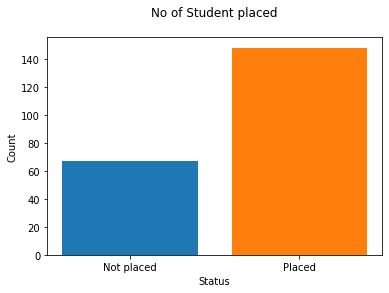

In [13]:
print("Number of not placed Student "+ str(len(data[data["status"]==0])))
print("Number of placed Student "+ str(len(data[data["status"]=="Placed"])))

plt.bar([0],height=len(data[data["status"]==0]))
plt.bar([1],height=len(data[data["status"]==1]))

plt.xlabel("Status")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Not placed', 'Placed'))
plt.title("No of Student placed\n")
plt.show()


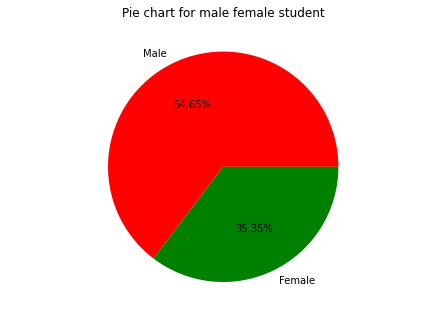

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Male','Female']
students = [139,76]
ax.pie(students, labels = langs,autopct='%1.2f%%',colors = ["red", "green"])
plt.title('Pie chart for male female student')
plt.show()


In [15]:
numerical_df=data.select_dtypes(["float64","int64"])
values = [(numerical_df['ssc_p'].mean()),(numerical_df['hsc_p'].mean()),(numerical_df['mba_p'].mean()),(numerical_df['degree_p'].mean())]
print('scc_p mean = ' +str(numerical_df['ssc_p'].mean()))
print('hsc_p mean = ' +str(numerical_df['hsc_p'].mean()))
print('mba_p mean = ' +str(numerical_df['mba_p'].mean()))
print('degree_p mean = ' +str(numerical_df['degree_p'].mean()))

scc_p mean = 67.30339534883721
hsc_p mean = 66.33316279069768
mba_p mean = 62.278186046511635
degree_p mean = 66.37018604651163


In [17]:
x_train , x_test , y_train , y_test = train_test_split(
    data[['ssc_p','hsc_p','degree_p','workex','etest_p','mba_p']],
    data.status,
    test_size=0.2)
x_train.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p
188,61.8,47.0,54.38,0,57.00,56.13
64,80.0,73.0,75.00,0,61.00,58.78
157,66.5,62.5,60.90,0,93.40,55.03
94,58.0,62.0,64.00,0,53.88,54.97
178,68.0,56.0,68.00,0,73.00,68.07


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [20]:
prediction=model.predict(x_test)


In [21]:
accuracy_score(y_test,prediction)

0.9069767441860465